In [163]:
from math import log, sqrt, exp
from scipy import stats
import pandas as pd
import os 
import numpy as np
os.chdir(r"C:\Users\Lenovo\Downloads")


In [ ]:
"""
Project Introduction:

Title: Evaluating Eurostoxx50 Option Smile & Trading Opportunities

Introduction:

In the world of options trading, understanding implied volatility and the volatility smile is crucial. This project dives into Eurostoxx50 options to analyze the smile, aiming to identify trading opportunities.

The volatility smile reflects varying implied volatilities across different option strike prices and maturities, providing insights into market sentiment and mispricing.

Objectives:

1. Data Collection: Gather Eurostoxx50 options data, including strikes, and prices.

2. Implied Volatility: Calculate implied volatility for each option to gauge market expectations.

3. Smile Analysis: Interpret the volatility smile and uncovering patterns.

Extension to the project: 

4. Monte Carlo Simulations: Estimate future option prices and identify mispricing opportunities.

5. Option Strategies: Apply strategies like butterflies and spreads to capitalize on mispricings.

6. Risk Management: Discuss risk mitigation and position sizing in options trading.

Throughout, we emphasize model assumptions, market conditions, and the role of implied volatility in trading.

By project end, we aim to provide insights into Eurostoxx50 options, empowering traders with decision-making tools.
"""

In [164]:
def bsm_call_value(S0, K, T, r, sigma):
#''' Valuation of European call option in Black sholes model.
#     Analytical formula.
#    Parameters:
#
#     S0 : float
#     initial stock/index level
#     K : float
#     strike price
#     T : float
#     maturity date (in year fractions)
#     r : float
#     constant risk-free short rate
#     sigma : float
#     volatility factor in diffusion term
#     Returns
#     =======
#     value : float
#     present value of the European call option
#     '''
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)- K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

In [165]:
# Vega function
def bsm_vega(S0, K, T, r, sigma):
#     ''' Vega of European option in Black sholes model.
#     Parameters:
#
#     S0 : float
#     initial stock/index level
#     K : float
#     strike price
#     T : float
#     maturity date (in year fractions)
#     r : float
#     constant risk-free short rate
#     sigma : float
#     volatility factor in diffusion term
#     Returns
#     =======
#     vega : float
#     partial derivative of BSM formula with respect
#     to sigma, i.e. Vega
#     '''
    
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T )/ (sigma * sqrt(T))
    vega = S0 * stats.norm.cdf(d1, 0.0, 1.0) * sqrt(T)
    return vega


In [166]:
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it):
#     ''' Implied volatility of European call option in BSM model.
#     Parameters
#     ==========
#     S0 : float
#     initial stock/index level
#     K : float
#     strike price
#     T : float
#     maturity date (in year fractions)
#     r : float
#     constant risk-free short rate
#     sigma_est : float
#     estimate of impl. volatility
#     it : integer
#     number of iterations
#     Returns
#     =======
#     simga_est : float
#     numerically estimated implied volatility
#     '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0)/ bsm_vega(S0, K, T, r, sigma_est))

    return sigma_est



In [192]:

     
T=float(25/365.25)
    #we will use the openning price of the 6th octber as S0 since almost all last trades in our dataset were based on this price
S0 = 4100.8
    #since the maturity is 31 october of this month, we are going to use the 1 month EURIBOR as the approximation of our rik free rate in our model
r = 0.03825
    # iterating over all option quotes

      
data = pd.read_csv("stoxx50options.csv")
options_data= data[["Strike","Last_price"]]
options_data
options_data['IMP_VOL'] = 0.0



for index, row in options_data.iterrows():
    strike = row['Strike']
    last_price = row['Last_price']
    imp_vol = bsm_call_imp_vol(S0, strike, T, r, last_price, sigma_est=1, it=1000)
    options_data.at[index, 'IMP_VOL'] = imp_vol*100
            

            
             # short rate
            
             # estimate for implied volatility
            
    



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3848\4147638688.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options_data['IMP_VOL'] = 0.0


In [193]:
options_data

,Strike,Last_price,IMP_VOL
0,3550.0,602.8,54.518497
1,3575.0,578.1,52.812573
2,3600.0,553.4,51.101970
3,3625.0,528.7,49.385787
4,3650.0,504.1,47.702219
5,3675.0,479.5,46.009162
6,3700.0,455.0,44.342716
7,3725.0,430.5,42.662361
8,3750.0,406.2,41.037376
9,3775.0,381.9,39.391436


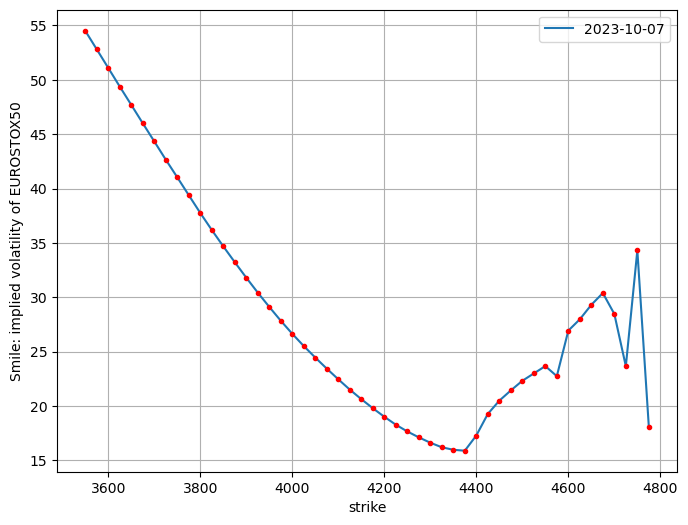

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# select data for this maturity
plt.plot(options_data['Strike'], options_data['IMP_VOL'],label="2023-10-07",lw=1.5)
plt.plot(options_data['Strike'], options_data['IMP_VOL'], 'r.')
plt.grid(True)
plt.xlabel('strike')
plt.ylabel('Smile: implied volatility of EUROSTOX50')
plt.legend()
plt.show()

In [ ]:
 
# Eurostoxx Smile Graph Interpretation
# We can notice that at the money options have an implied volatility of 19 percent, which is what the volatility index VSTOOX indicates, Hence validates our calculations 
# The Eurostoxx smile graph displays implied volatility levels across different strike prices of Eurostoxx50 options.


# 1. Smile Shape:
# - The graph exhibits a smile-shaped curve, indicating varying implied volatilities for options with different strike prices.
# - Near-the-money options have lower implied volatilities at the center, forming the "smile."

# 2. At-the-Money (ATM) Options:
# - Options with strike prices close to the current market price tend to have lower implied volatilities.
# - Market participants perceive these options as less risky or less prone to significant price swings.

# 3. Out-of-the-Money (OTM) Options:
# - Options with strike prices significantly above or below the current market price have higher implied volatilities.
# - Market participants expect greater price fluctuations for these options, possibly due to uncertainties or events.

# 4. Pricing Impact:
# - Since Implied volatilities directly affect option prices. Higher implied volatilities lead to higher option prices due to perceived risk.


# 5. Trading Strategies:
# - Traders and investors use smile information to design trading strategies.
# - Strategies may involve exploiting perceived overvaluation or undervaluation of implied volatilities relative to historical data or market indicators.

# In summary, the Eurostoxx smile graph helps understand market expectations regarding future volatility.
# Traders and analysts use it to assess risk, create option strategies, and make informed trading decisions.

In [200]:
# After evaluating the smile of the Eurostoxx50 for today's options,
# we can use a Monte Carlo simulation model to find option mispricing opportunities using an estimator for volatility, possibly today's implied volatility
# we can then Analyze the distribution of option payoffs to identify potential mispricing opportunities.
# we can look for scenarios where the option's expected payoff differs significantly from its market price.
# then we can Implement different option strategies like butterflies and spreads
# Calculate the expected profit/loss for each option strategy under various scenarios.
# at the end we can Identify strategies with favorable risk-reward profiles and potential mispricing opportunities.
#as time goes, we can monitor the delta of our position and dynamically hedge our position, by buying or selling the underlying to stay delta neutral
